## <center> Artificial Intelligence </center>
# <center> LAB PROJECT SUBMISSION </center>
<bold> <center> Submitted to: </bold> Ms Swati Kumari </center>
 <bold> <center> Submitted by: </bold> Aaditya Vardhan(102117021), Shubham Gandhi(102117007), Rahul Divi(102117011), Aryan Raghuwanshi(102117030) </center>

## Problem Statement

Predict the Adani Enterprises Stock Price for the next 30 days.

There are Open, High, Low and Close prices that you need to obtain from the web for each day starting from 2015 to 2022 for adani Industries stock.

- Split the last year into a test set- to build a model to predict stock price.

- Find short term, & long term trends.

- Understand how it is impacted from external factors or any big external events.

- Forecast for next 30 days.

## Description of problem:
- The project finds Open, High, Low and Close prices 
- Understanding of the external and internal factors of the stock
- Forecast for the next 30 days

## Collection of Dataset

- For this project, we will be using the Yfinance library to get the data, which makes it easy to process.

- We collected data from 1-Jan-2015 to 28-Feb-2023.

- But also you can download data from ‘Yahoo! Finance’ website. You can use Below link. 

- https://finance.yahoo.com/quote/adani.NS/history?p=adani.NS

## About the data

- Date: Date of trade

- Open: Opening Price of Stock

- High: Highest price of stock on that day

- Low: Lowest price of stock on that day

- Close: Close price adjusted for splits.

- Adj  Close: Adjusted close price adjusted for splits and dividend and/or capital gain distributions.

- Volume: Volume of stock on that day

### Importing Used Modules
- Brief Description of the imported modules
1. pandas 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing dataset
data=yf.download('adani.NS', start='2015-1-1', end='2023-2-28').reset_index(drop=False)
adani_0 = pd.DataFrame(data)

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ADANI.NS: No timezone found, symbol may be delisted


In [3]:
adani_0.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume


In [4]:
adani_0.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume


# EDA

Analysis is only based on Open, High, Low, close price and volume

There is no need of Adj Close

In [5]:
# Removing "Adj Close" columnfrom dataset
adani_1=adani_0.drop(["Adj Close"],axis=1).reset_index(drop=True)
adani_1

,Date,Open,High,Low,Close,Volume


In [6]:
# Finding duplicate columns, if any
adani_1[adani_1.duplicated()]

,Date,Open,High,Low,Close,Volume


In [7]:
# Finding null values, if any
adani_1.isnull().sum()

Date      0.0
Open      0.0
High      0.0
Low       0.0
Close     0.0
Volume    0.0
dtype: float64

In [8]:
#To check which rows have any missing value under any column
adani_1[adani_1.isnull().any(axis=1)]

,Date,Open,High,Low,Close,Volume


In [9]:
# Removing the row which have null value
adani_2=adani_1.dropna().reset_index(drop=True)
adani_2

,Date,Open,High,Low,Close,Volume


In [10]:
# Checking wether if there exist any null values
adani_2[adani_2.isnull().any(axis=1)]

,Date,Open,High,Low,Close,Volume


In [11]:
# Making a copy of dataset as adani
adani=adani_2.copy()
adani

,Date,Open,High,Low,Close,Volume


#### Discriptive Statistics

In [12]:
adani.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    0 non-null      object 
 1   Open    0 non-null      float64
 2   High    0 non-null      float64
 3   Low     0 non-null      float64
 4   Close   0 non-null      float64
 5   Volume  0 non-null      float64
dtypes: float64(5), object(1)
memory usage: 132.0+ bytes


In [13]:
adani.describe()

,Open,High,Low,Close,Volume
count,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN


In [14]:
adani.corr()

,Open,High,Low,Close,Volume
Open,NaN,NaN,NaN,NaN,NaN
High,NaN,NaN,NaN,NaN,NaN
Low,NaN,NaN,NaN,NaN,NaN
Close,NaN,NaN,NaN,NaN,NaN
Volume,NaN,NaN,NaN,NaN,NaN


- Every attributes are highly corelated except volume

In [15]:
# converting the date column in to datetime 
adani['Date']=pd.to_datetime(adani['Date'],format='%Y-%m-%d')
adani

,Date,Open,High,Low,Close,Volume


In [16]:
# Setting the date column as index
adani=adani.set_index('Date')
adani

,Open,High,Low,Close,Volume
Date,,,,,


### Visualizations

Text(0.5, 1.0, 'Low')

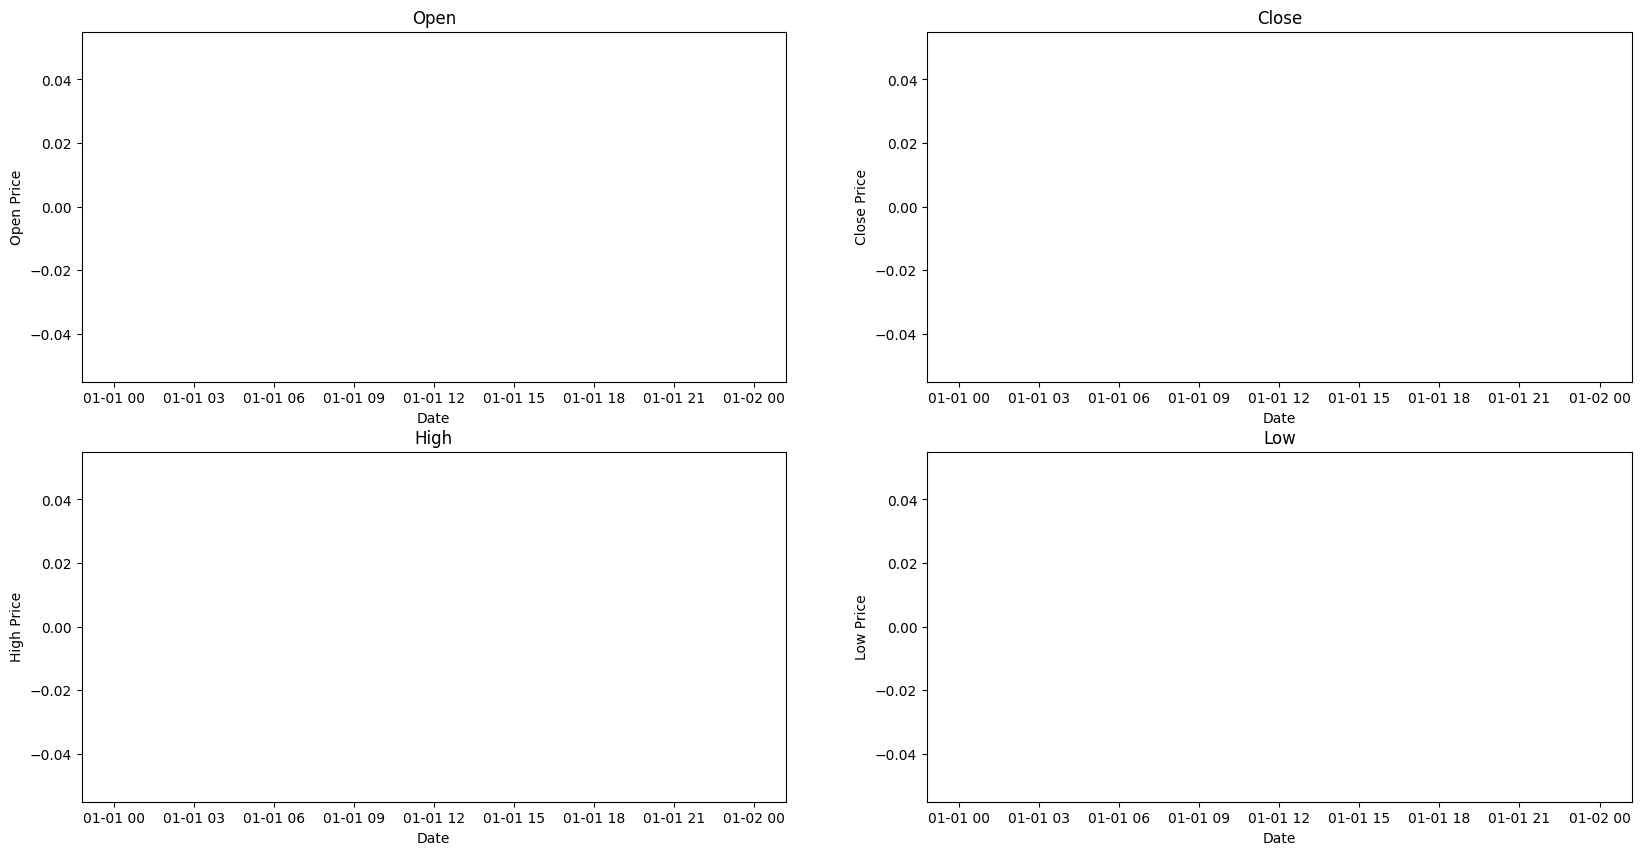

In [17]:
plt.figure(figsize=(20,10))
#Plot 1
plt.subplot(2,2,1)
plt.plot(adani['Open'],color='green')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Open')
#Plot 2
plt.subplot(2,2,2)
plt.plot(adani['Close'],color='red')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close')
#Plot 3
plt.subplot(2,2,3)
plt.plot(adani['High'],color='green')
plt.xlabel('Date')
plt.ylabel('High Price')
plt.title('High')
#Plot 4
plt.subplot(2,2,4)
plt.plot(adani['Low'],color='red')
plt.xlabel('Date')
plt.ylabel('Low Price')
plt.title('Low')

Text(0.5, 1.0, 'Low')

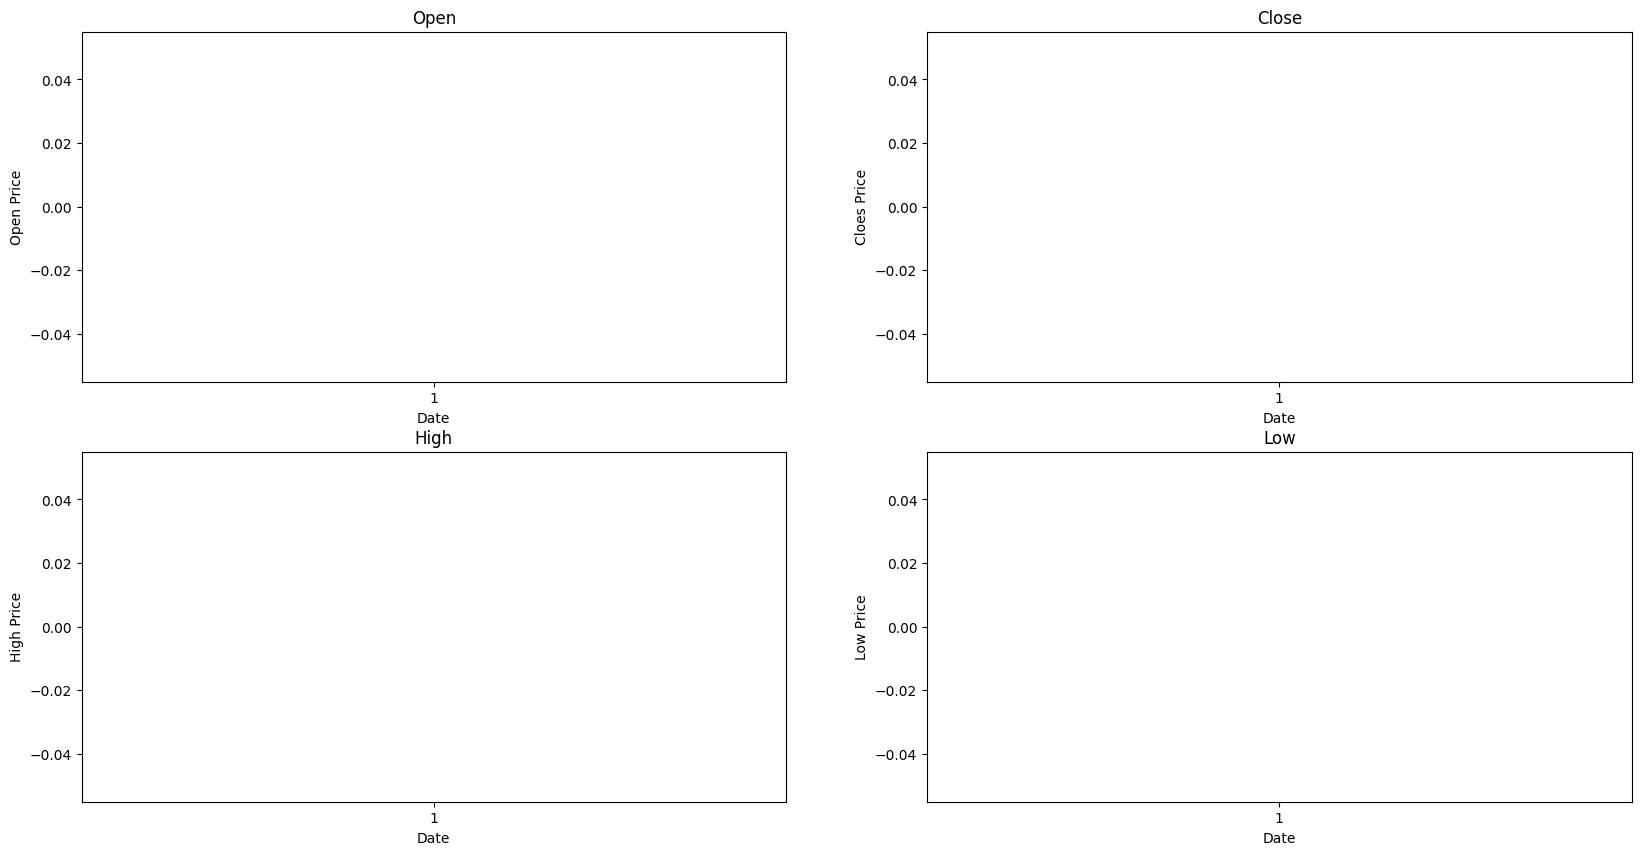

In [18]:
# Creating box-plots
plt.figure(figsize=(20,10))
#Plot 1
plt.subplot(2,2,1)
plt.boxplot(adani['Open'])
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Open')
#Plot 2
plt.subplot(2,2,2)
plt.boxplot(adani['Close'])
plt.xlabel('Date')
plt.ylabel('Cloes Price')
plt.title('Close')
#Plot 3
plt.subplot(2,2,3)
plt.boxplot(adani['High'])
plt.xlabel('Date')
plt.ylabel('High Price')
plt.title('High')
#Plot 4
plt.subplot(2,2,4)
plt.boxplot(adani['Low'])
plt.xlabel('Date')
plt.ylabel('Low Price')
plt.title('Low')

From the box plot it is clear that there are no outliers inthe dataset

Text(0.5, 1.0, 'Low')

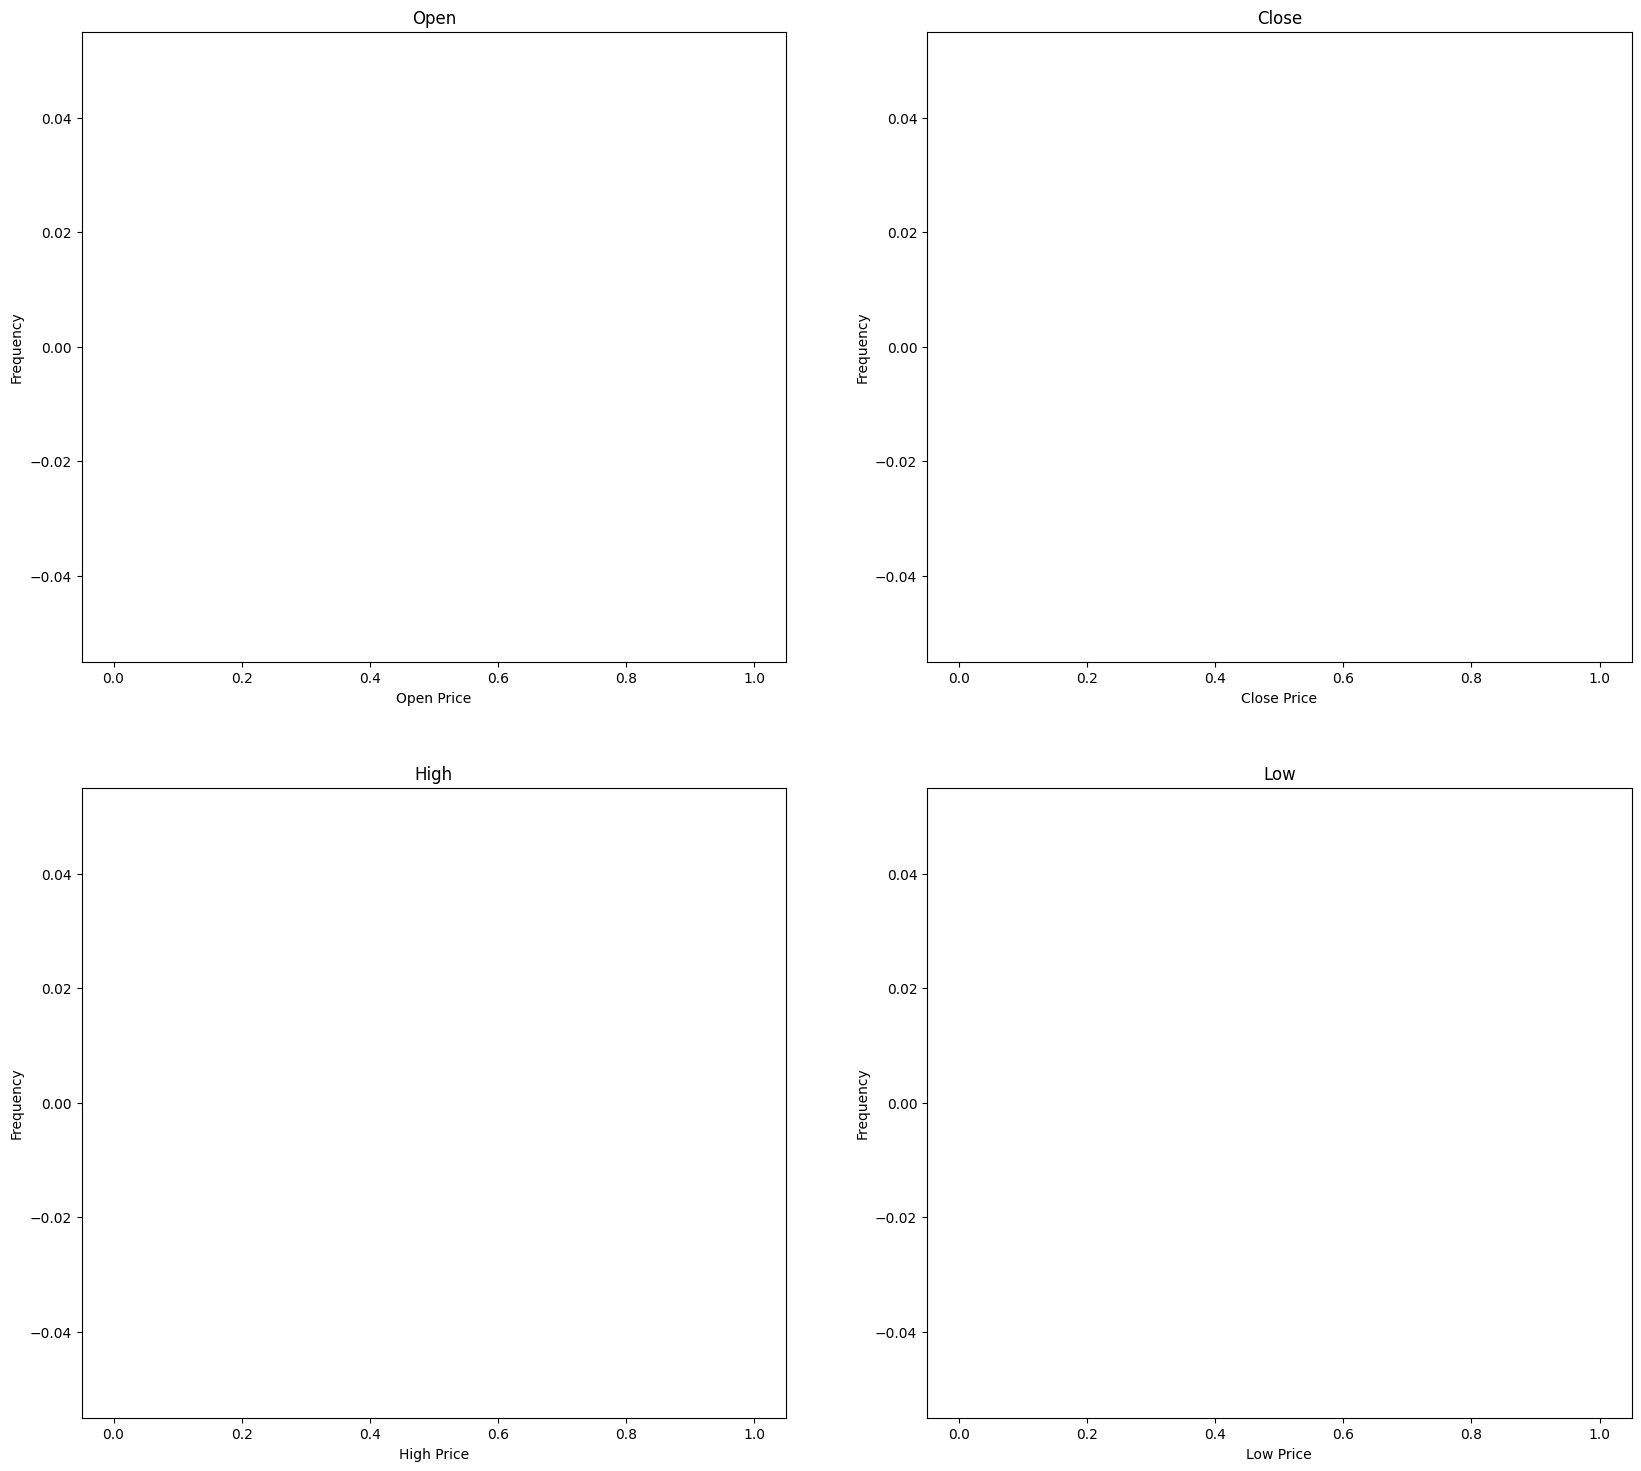

In [19]:
# Ploting Histogram
plt.figure(figsize=(20,18))
#Plot 1
plt.subplot(2,2,1)
plt.hist(adani['Open'],bins=50, color='green')
plt.xlabel("Open Price")
plt.ylabel("Frequency")
plt.title('Open')
#Plot 2
plt.subplot(2,2,2)
plt.hist(adani['Close'],bins=50, color='red')
plt.xlabel("Close Price")
plt.ylabel("Frequency")
plt.title('Close')
#Plot 3
plt.subplot(2,2,3)
plt.hist(adani['High'],bins=50, color='green')
plt.xlabel("High Price")
plt.ylabel("Frequency")
plt.title('High')
#Plot 4
plt.subplot(2,2,4)
plt.hist(adani['Low'],bins=50, color='red')
plt.xlabel("Low Price")
plt.ylabel("Frequency")
plt.title('Low')

Text(0.5, 1.0, 'Low')

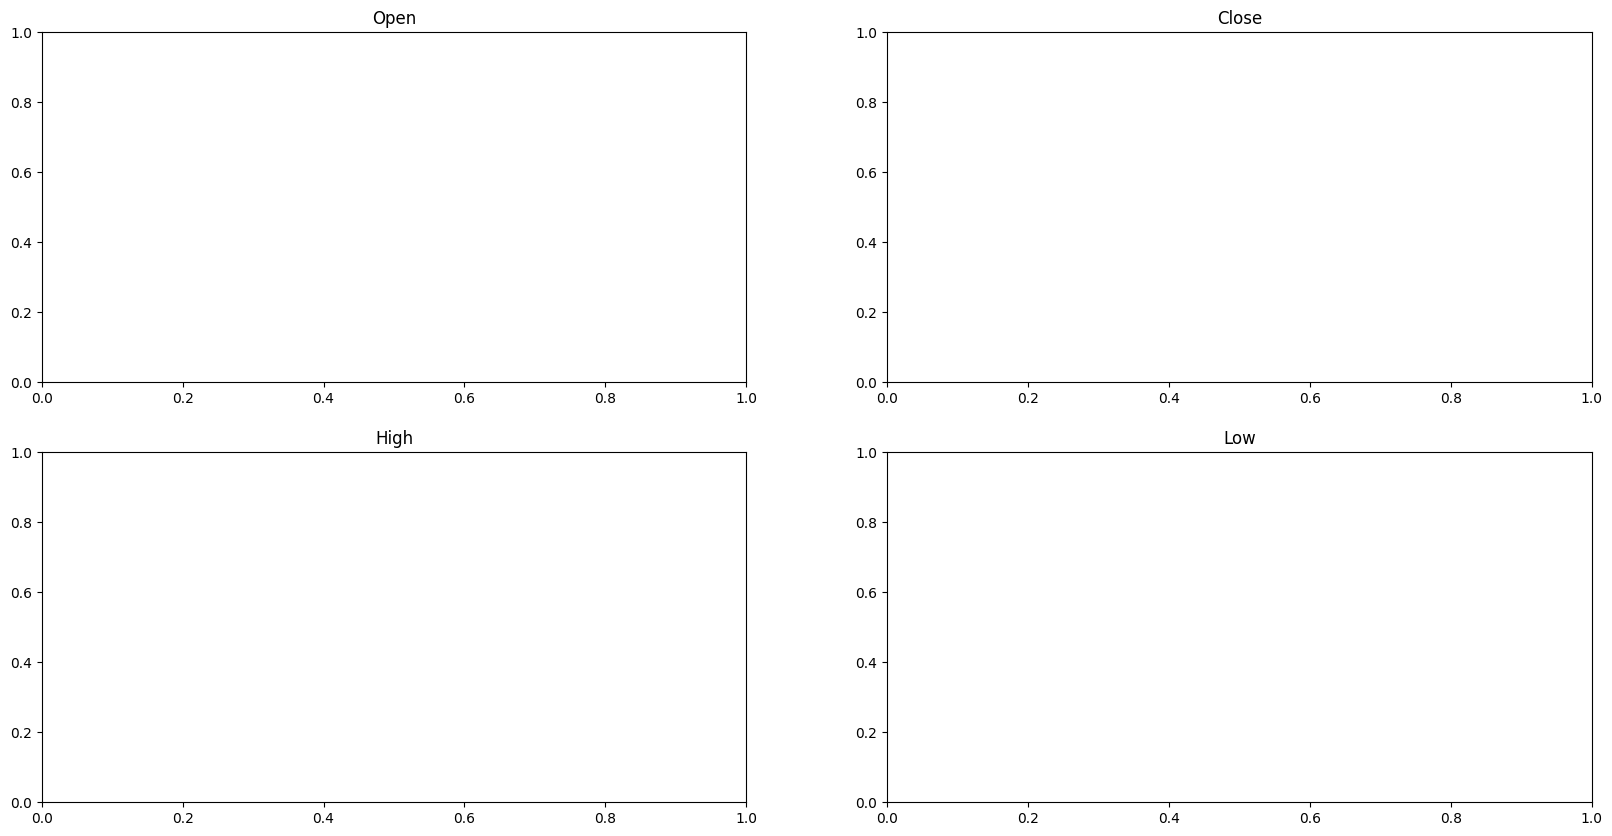

In [20]:
# KDE-Plots
plt.figure(figsize=(20,10))
#Plot 1
plt.subplot(2,2,1)
sns.kdeplot(adani['Open'], color='green')
plt.title('Open')
#Plot 2
plt.subplot(2,2,2)
sns.kdeplot(adani['Close'], color='red')
plt.title('Close')
#Plot 3
plt.subplot(2,2,3)
sns.kdeplot(adani['High'], color='green')
plt.title('High')
#Plot 4
plt.subplot(2,2,4)
sns.kdeplot(adani['Low'], color='red')
plt.title('Low')

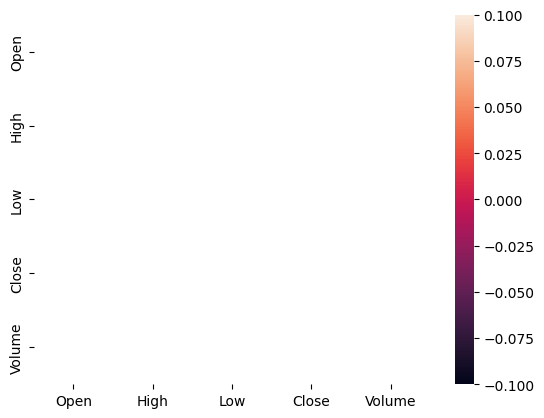

In [21]:
sns.heatmap(adani.corr(),annot=True)
plt.show()

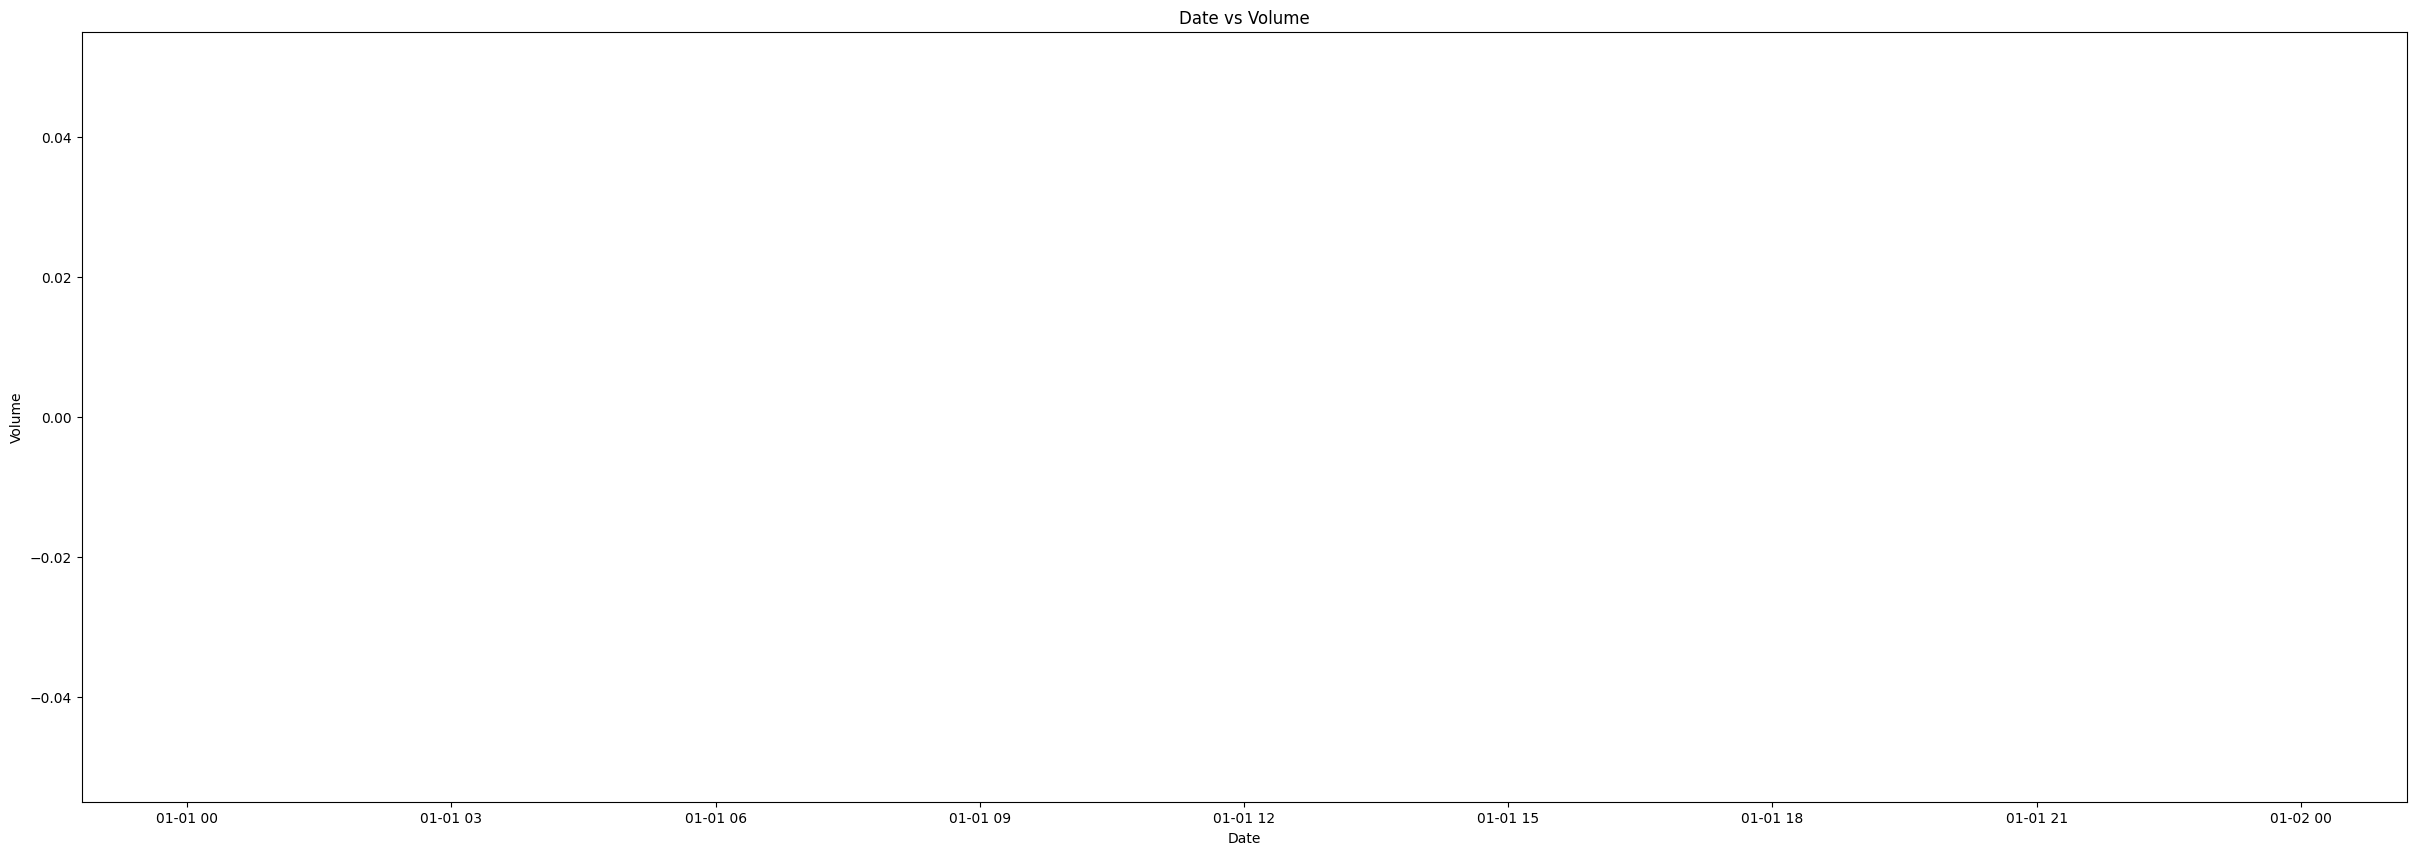

In [22]:
figure=plt.figure(figsize=(30,10))
plt.plot(adani['Volume'])
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Date vs Volume')
plt.show()

## Finding long-term and short-term trends

### Moving Average

In [23]:
adani_ma=adani.copy()
adani_ma['30-day MA']=adani['Close'].rolling(window=30).mean()
adani_ma['200-day MA']=adani['Close'].rolling(window=200).mean()

In [24]:
adani_ma

,Open,High,Low,Close,Volume,30-day MA,200-day MA
Date,,,,,,,


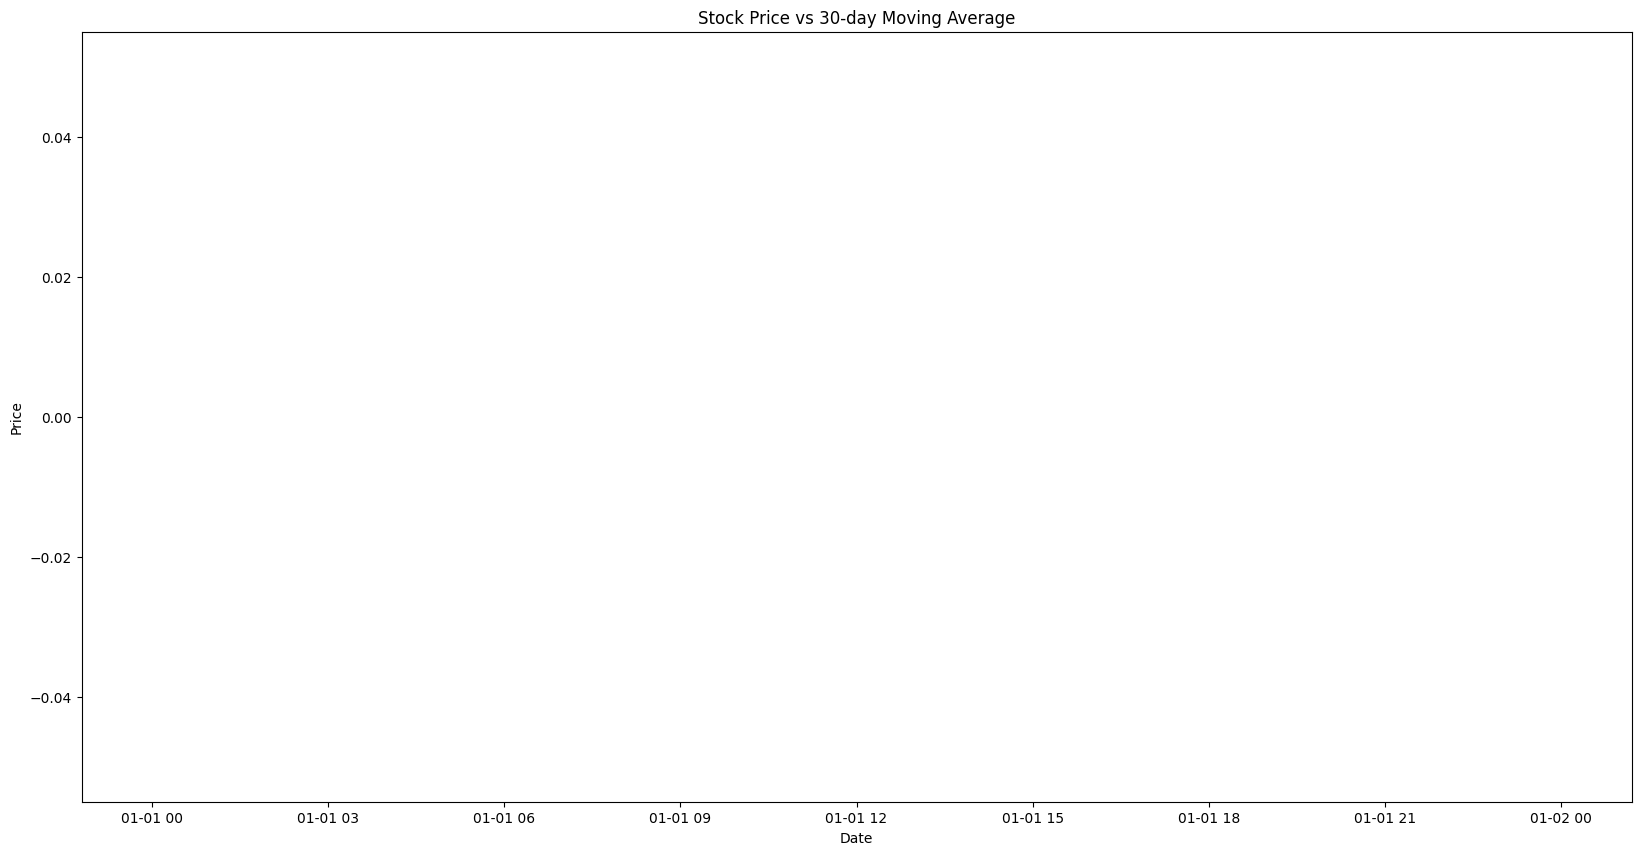

In [25]:
plt.figure(figsize=(20,10))
plt.plot(adani_ma['Close'],label='Original data')
plt.plot(adani_ma['30-day MA'],label='30-MA')
plt.legend
plt.title('Stock Price vs 30-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

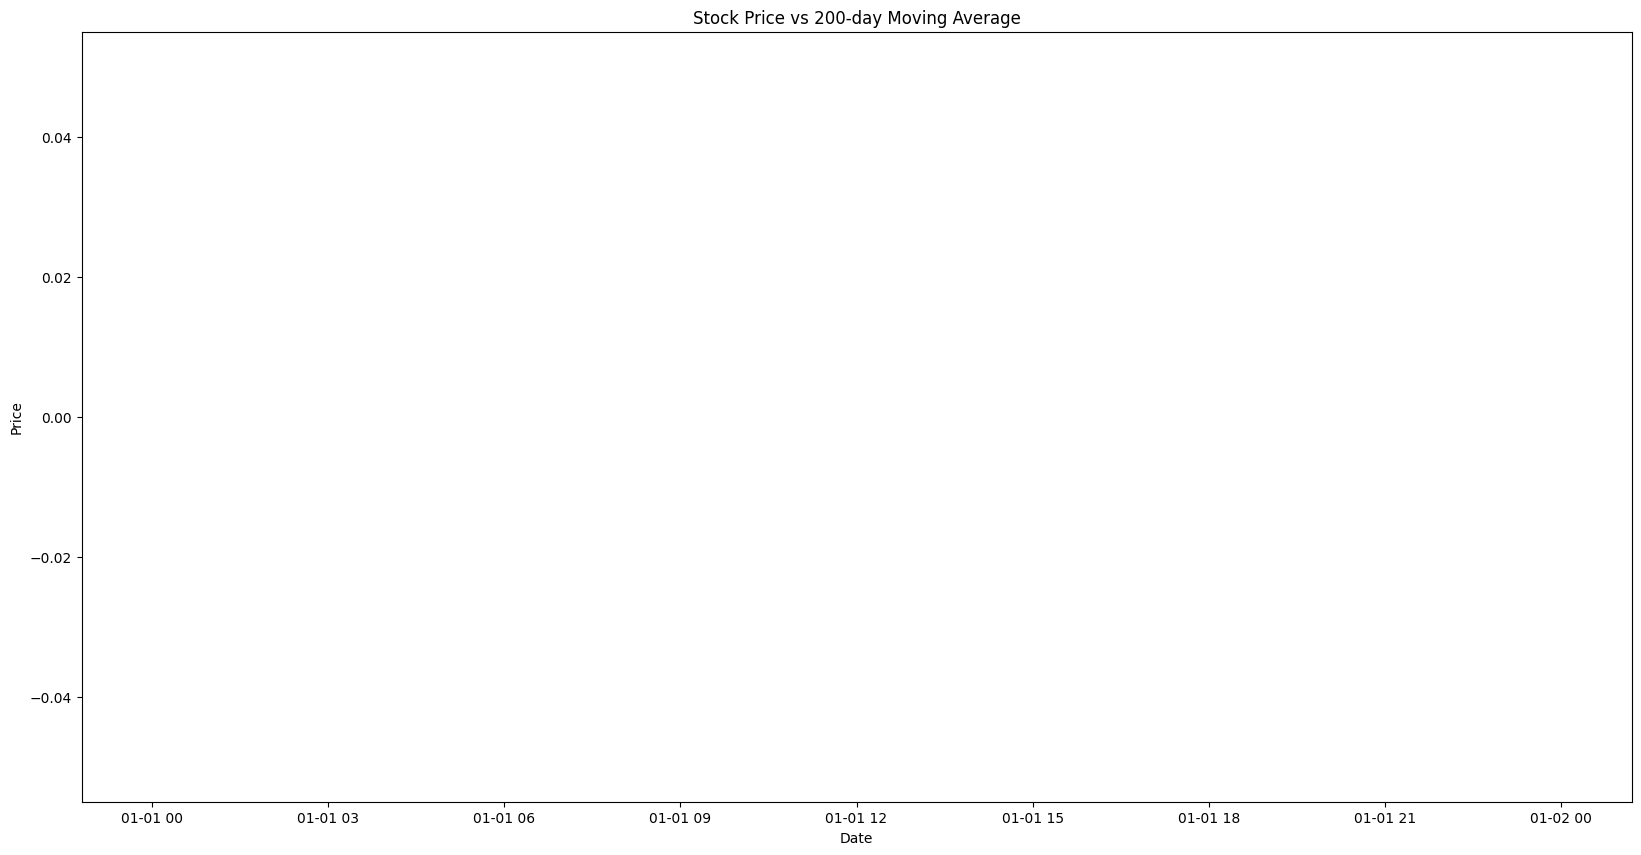

In [26]:
plt.figure(figsize=(20,10))
plt.plot(adani_ma['Close'],label='Original data')
plt.plot(adani_ma['200-day MA'],label='200-MA')
plt.legend
plt.title('Stock Price vs 200-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

Long term and short term trends can be identified using the Moving Average graphs
- In long term, Stock price is in upward trend
- Short term trends can be identified from MA-30 chart
- Stock had a major short term downtrend during the year 2020
- It may be due to the bearish market during the Covid-19 outbraek

## Model Building

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.layers import LSTM, GRU

from itertools import cycle

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [28]:
adani

,Open,High,Low,Close,Volume
Date,,,,,


In [29]:
# Creating dataframe which only includes date and close time

close_df=pd.DataFrame(adani['Close'])
close_df

,Close
Date,


In [30]:
print(close_df.shape)

(0, 1)


In [31]:
close_df=close_df.reset_index()

In [32]:
close_df['Date']

Series([], Name: Date, dtype: datetime64[ns])

### Normalizing / scaling close value between 0 to 1

In [33]:
close_stock = close_df.copy()
del close_df['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(close_df).reshape(-1,1))
print(closedf.shape)

ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by MinMaxScaler.

### Split data for training and testing
- Ratio for training and testing data is 86:14

In [ ]:
training_size=int(len(closedf)*0.86)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (1733, 1)
test_data:  (283, 1)


### Create new dataset according to requirement of time-series prediction

In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 13
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (1719, 13)
y_train:  (1719,)
X_test:  (269, 13)
y_test (269,)


## Algorithms

## Support vector regression - SVR

In [ ]:
import math
from sklearn.svm import SVR

svr_rbf = SVR(kernel= 'rbf', C= 1e3, gamma= 0.01)
svr_rbf.fit(X_train, y_train)

SVR(C=1000.0, gamma=0.01)

In [ ]:
# Lets Do the prediction 

train_predict=svr_rbf.predict(X_train)
test_predict=svr_rbf.predict(X_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

Train data prediction: (1719, 1)
Test data prediction: (269, 1)


In [ ]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

### Evaluation metrices RMSE, MSE and MAE

Root Mean Square Error (RMSE), Mean Square Error (MSE) and Mean absolute Error (MAE) are a standard way to measure the error of a model in predicting quantitative data.

In [ ]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))


Train data RMSE:  53.85670681684616
Train data MSE:  2900.544869155724
Test data MAE:  39.36645282732302
-------------------------------------------------------------------------------------
Test data RMSE:  87.57146026775241
Test data MSE:  7668.760653426539
Test data MAE:  70.07967998501645


### Explained variance regression score

The explained variance score explains the dispersion of errors of a given dataset, and the formula is written as follows: Here, and Var(y) is the variance of prediction errors and actual values respectively. Scores close to 1.0 are highly desired, indicating better squares of standard deviations of errors.

In [ ]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9928377308769303
Test data explained variance regression score: 0.5781743381324682


### R2 score for regression
R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

1 = Best

0 or < 0 = worse

In [ ]:
train_r2_svr=r2_score(original_ytrain, train_predict)
test_r2_svr=r2_score(original_ytest, test_predict)
print("Train data R2 score:", train_r2_svr)
print("Test data R2 score:", test_r2_svr)

Train data R2 score: 0.9928173702339906
Test data R2 score: 0.49266370365735235


### Comparision between original stock close price vs predicted close price

In [ ]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])

plotdf = pd.DataFrame({'Date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['Date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','Date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (2016, 1)
Test predicted data:  (2016, 1)


### Predicting next 30 days

In [ ]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        
        yhat = svr_rbf.predict(x_input)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        yhat = svr_rbf.predict(x_input)
        
        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())
        
        i=i+1
        
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


### Plotting last 15 days and next predicted 30 days

In [ ]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
[14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37
 38 39 40 41 42 43]


In [ ]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

### Plotting whole closing stock price with prediction

In [ ]:
svrdf=closedf.tolist()
svrdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
svrdf=scaler.inverse_transform(svrdf).reshape(1,-1).tolist()[0]

names = cycle(['Close Price'])

fig = px.line(svrdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

## Random Forest Regressor - RF

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [ ]:
# Lets Do the prediction 

train_predict=regressor.predict(X_train)
test_predict=regressor.predict(X_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

Train data prediction: (1719, 1)
Test data prediction: (269, 1)


In [ ]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

### Evaluation metrices RMSE, MSE and MAE
Root Mean Square Error (RMSE), Mean Square Error (MSE) and Mean absolute Error (MAE) are a standard way to measure the error of a model in predicting quantitative data.

In [ ]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  9.957621376341947
Train data MSE:  99.15422347458208
Test data MAE:  6.326936978023383
-------------------------------------------------------------------------------------
Test data RMSE:  49.26346909891491
Test data MSE:  2426.889387659744
Test data MAE:  36.74819274221652


### Explained variance regression score
The explained variance score explains the dispersion of errors of a given dataset, and the formula is written as follows: Here, and Var(y) is the variance of prediction errors and actual values respectively. Scores close to 1.0 are highly desired, indicating better squares of standard deviations of errors.

In [ ]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9997545334452742
Test data explained variance regression score: 0.8410796804542147


### R2 score for regression
R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

1 = Best
0 or < 0 = worse

In [ ]:
train_r2_rf=r2_score(original_ytrain, train_predict)
test_r2_rf=r2_score(original_ytest, test_predict)
print("Train data R2 score:", train_r2_rf)
print("Test data R2 score:", test_r2_rf)

Train data R2 score: 0.9997544640372478
Test data R2 score: 0.8394461466184335


### Comparision between original stock close price vs predicted close price

In [ ]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'Date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['Date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','Date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (2016, 1)
Test predicted data:  (2016, 1)


### Predicting next 30 days

In [ ]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        
        yhat = regressor.predict(x_input)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        yhat = regressor.predict(x_input)
        
        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())
        
        i=i+1
        
print("Output of predicted next days: ", len(lst_output))


Output of predicted next days:  30


### Plotting last 15 days and next predicted 30 days

In [ ]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
[14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37
 38 39 40 41 42 43]


In [ ]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

### Plotting whole closing stock price with prediction

In [ ]:
rfdf=closedf.tolist()
rfdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
rfdf=scaler.inverse_transform(rfdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(rfdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

### K-nearest neighgbour - KNN

In [ ]:
from sklearn import neighbors

K = time_step
neighbor = neighbors.KNeighborsRegressor(n_neighbors = K)
neighbor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=13)

In [ ]:
# Lets Do the prediction 

train_predict=neighbor.predict(X_train)
test_predict=neighbor.predict(X_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

Train data prediction: (1719, 1)
Test data prediction: (269, 1)


In [ ]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

### Evaluation metrices RMSE, MSE and MAE
Root Mean Square Error (RMSE), Mean Square Error (MSE) and Mean absolute Error (MAE) are a standard way to measure the error of a model in predicting quantitative data.

In [ ]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  31.26989801027244
Train data MSE:  977.8065215728402
Test data MAE:  19.9213659517204
-------------------------------------------------------------------------------------
Test data RMSE:  61.91976520595533
Test data MSE:  3834.0573231606363
Test data MAE:  47.47158990630361


### Explained variance regression score
The explained variance score explains the dispersion of errors of a given dataset, and the formula is written as follows: Here, and Var(y) is the variance of prediction errors and actual values respectively. Scores close to 1.0 are highly desired, indicating better squares of standard deviations of errors.

In [ ]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9975802136664563
Test data explained variance regression score: 0.747109311261385


### R2 score for regression
R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

1 = Best
0 or < 0 = worse

In [ ]:
train_r2_knn=r2_score(original_ytrain, train_predict)
test_r2_knn=r2_score(original_ytest, test_predict)
print("Train data R2 score:", train_r2_knn)
print("Test data R2 score:", test_r2_knn)

Train data R2 score: 0.9975786541687627
Test data R2 score: 0.7463532205261103


### Comparision between original stock close price vs predicted close price

In [ ]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])

plotdf = pd.DataFrame({'Date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['Date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','Date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (2016, 1)
Test predicted data:  (2016, 1)


### Predicting next 30 days

In [ ]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        
        yhat = neighbor.predict(x_input)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        yhat = neighbor.predict(x_input)
        
        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())
        
        i=i+1
        
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


### Plotting last 15 days and next predicted 30 days

In [ ]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
[14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37
 38 39 40 41 42 43]


In [ ]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()


### Plotting whole closing stock price with prediction

In [ ]:
knndf=closedf.tolist()
knndf.extend((np.array(lst_output).reshape(-1,1)).tolist())
knndf=scaler.inverse_transform(knndf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(knndf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()


### LSTM

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (1719, 13, 1)
X_test:  (269, 13, 1)


### LSTM model structure

In [ ]:
tf.keras.backend.clear_session()
model=Sequential()
model.add(LSTM(32,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(32,return_sequences=True))
model.add(LSTM(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 13, 32)            4352      
                                                                 
 lstm_1 (LSTM)               (None, 13, 32)            8320      
                                                                 
 lstm_2 (LSTM)               (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 21,025
Trainable params: 21,025
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
54/54 [==============================] - 7s 31ms/step - loss: 0.0201 - val_loss: 0.0044
Epoch 2/100
54/54 [==============================] - 0s 8ms/step - loss: 7.0732e-04 - val_loss: 0.0017
Epoch 3/100
54/54 [==============================] - 0s 8ms/step - loss: 7.0233e-04 - val_loss: 0.0017
Epoch 4/100
54/54 [==============================] - 0s 8ms/step - loss: 6.7979e-04 - val_loss: 0.0018
Epoch 5/100
54/54 [==============================] - 0s 8ms/step - loss: 6.6234e-04 - val_loss: 0.0016
Epoch 6/100
54/54 [==============================] - 0s 9ms/step - loss: 6.5569e-04 - val_loss: 0.0016
Epoch 7/100
54/54 [==============================] - 0s 8ms/step - loss: 6.5499e-04 - val_loss: 0.0020
Epoch 8/100
54/54 [==============================] - 0s 8ms/step - loss: 6.4795e-04 - val_loss: 0.0019
Epoch 9/100
54/54 [==============================] - 0s 8ms/step - loss: 6.4510e-04 - val_loss: 0.0016
Epoch 10/100
54/54 [==============================] - 0s 8ms/step - loss: 6.

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

9/9 [==============================] - 0s 2ms/step


((1719, 1), (269, 1))

In [ ]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

### Evaluation metrices RMSE, MSE and MAE
Root Mean Square Error (RMSE), Mean Square Error (MSE) and Mean absolute Error (MAE) are a standard way to measure the error of a model in predicting quantitative data.

In [ ]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  25.464029352958327
Train data MSE:  648.4167908883234
Test data MAE:  16.789255831254092
-------------------------------------------------------------------------------------
Test data RMSE:  41.25275130916073
Test data MSE:  1701.789490575462
Test data MAE:  31.24293262807853


### Explained variance regression score
The explained variance score explains the dispersion of errors of a given dataset, and the formula is written as follows: Here, and Var(y) is the variance of prediction errors and actual values respectively. Scores close to 1.0 are highly desired, indicating better squares of standard deviations of errors.

In [ ]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9983966445932151
Test data explained variance regression score: 0.8878461359036043


### R2 score for regression
R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

1 = Best
0 or < 0 = worse

In [ ]:
train_r2_lstm=r2_score(original_ytrain, train_predict)
test_r2_lstm=r2_score(original_ytest, test_predict)
print("Train data R2 score:", train_r2_lstm)
print("Test data R2 score:", test_r2_lstm)

Train data R2 score: 0.998394323151991
Test data R2 score: 0.8874160224419545


### Comparision between original stock close price vs predicted close price

In [ ]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'Date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['Date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','Date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (2016, 1)
Test predicted data:  (2016, 1)


### Predicting next 30 days

In [ ]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        
        lst_output.extend(yhat.tolist())
        i=i+1
               
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


### Plotting last 15 days and next predicted 30 days

In [ ]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
[14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37
 38 39 40 41 42 43]


In [ ]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

### Plotting whole closing stock price with prediction

In [ ]:
lstmdf=closedf.tolist()
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(lstmdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

### GRU (Gated Recurrent Unit)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (1719, 13, 1)
X_test:  (269, 13, 1)


In [ ]:
tf.keras.backend.clear_session()
model=Sequential()
model.add(GRU(32,return_sequences=True,input_shape=(time_step,1)))
model.add(GRU(32,return_sequences=True))
model.add(GRU(32,return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 13, 32)            3360      
                                                                 
 gru_1 (GRU)                 (None, 13, 32)            6336      
                                                                 
 gru_2 (GRU)                 (None, 13, 32)            6336      
                                                                 
 gru_3 (GRU)                 (None, 32)                6336      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 22,401
Trainable params: 22,401
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
54/54 [==============================] - 10s 38ms/step - loss: 0.0131 - val_loss: 0.0020
Epoch 2/100
54/54 [==============================] - 1s 11ms/step - loss: 4.9975e-04 - val_loss: 0.0013
Epoch 3/100
54/54 [==============================] - 1s 11ms/step - loss: 4.4992e-04 - val_loss: 0.0011
Epoch 4/100
54/54 [==============================] - 1s 11ms/step - loss: 4.7099e-04 - val_loss: 0.0011
Epoch 5/100
54/54 [==============================] - 1s 11ms/step - loss: 4.3779e-04 - val_loss: 0.0010
Epoch 6/100
54/54 [==============================] - 1s 11ms/step - loss: 4.8112e-04 - val_loss: 9.1777e-04
Epoch 7/100
54/54 [==============================] - 1s 11ms/step - loss: 4.2299e-04 - val_loss: 9.2955e-04
Epoch 8/100
54/54 [==============================] - 1s 10ms/step - loss: 3.6134e-04 - val_loss: 8.5727e-04
Epoch 9/100
54/54 [==============================] - 1s 11ms/step - loss: 3.8097e-04 - val_loss: 8.0997e-04
Epoch 10/100
54/54 [==============================]

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

9/9 [==============================] - 0s 2ms/step


((1719, 1), (269, 1))

In [ ]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

### Evaluation metrices RMSE, MSE and MAE
Root Mean Square Error (RMSE), Mean Square Error (MSE) and Mean absolute Error (MAE) are a standard way to measure the error of a model in predicting quantitative data.

In [ ]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  28.431850271240076
Train data MSE:  808.3701098462144
Test data MAE:  21.56033254182914
-------------------------------------------------------------------------------------
Test data RMSE:  44.460051931225436
Test data MSE:  1976.6962177272628
Test data MAE:  33.570627432330404


### Explained variance regression score
The explained variance score explains the dispersion of errors of a given dataset, and the formula is written as follows: Here, and Var(y) is the variance of prediction errors and actual values respectively. Scores close to 1.0 are highly desired, indicating better squares of standard deviations of errors.

In [ ]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9985097922283964
Test data explained variance regression score: 0.8929919146546081


### R2 score for regression
R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

1 = Best
0 or < 0 = worse

In [ ]:
train_r2_gru=r2_score(original_ytrain, train_predict)
test_r2_gru=r2_score(original_ytest, test_predict)
print("Train data R2 score:", train_r2_gru)
print("Test data R2 score:", test_r2_gru)

Train data R2 score: 0.9979982301688635
Test data R2 score: 0.8692292296737442


### Comparision between original stock close price vs predicted close price

In [ ]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)


names = cycle(['Original close price','Train predicted close price','Test predicted close price'])

plotdf = pd.DataFrame({'Date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['Date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','Date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (2016, 1)
Test predicted data:  (2016, 1)


In [ ]:
plotdf.head(100)

,Date,original_close,train_predicted_close,test_predicted_close
0,2015-01-01,439.781311,NaN,NaN
1,2015-01-02,438.617340,NaN,NaN
2,2015-01-05,433.812897,NaN,NaN
3,2015-01-06,414.124512,NaN,NaN
4,2015-01-07,423.139069,NaN,NaN
...,...,...,...,...
95,2015-05-25,443.050323,431.086243,NaN
96,2015-05-26,438.146820,429.016113,NaN
97,2015-05-27,438.493530,424.943085,NaN
98,2015-05-28,433.788116,423.424255,NaN


### Predicting next 30 days

In [ ]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        
        lst_output.extend(yhat.tolist())
        i=i+1
               
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


### Plotting last 15 days and next predicted 30 days

In [ ]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]
[14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37
 38 39 40 41 42 43]


In [ ]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})
names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

### Plotting whole closing stock price with prediction

In [ ]:
grudf=closedf.tolist()
grudf.extend((np.array(lst_output).reshape(-1,1)).tolist())
grudf=scaler.inverse_transform(grudf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])
fig = px.line(grudf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
finaldf = pd.DataFrame({
    'svr':svrdf,
    'rf':rfdf,
    'knn':knndf,
    'lstm':lstmdf,
    'gru':grudf,
})
finaldf

,svr,rf,knn,lstm,gru
0,439.781311,439.781311,439.781311,439.781311,439.781311
1,438.617340,438.617340,438.617340,438.617340,438.617340
2,433.812897,433.812897,433.812897,433.812897,433.812897
3,414.124512,414.124512,414.124512,414.124512,414.124512
4,423.139069,423.139069,423.139069,423.139069,423.139069
...,...,...,...,...,...
2041,2260.744861,2394.921494,2410.892278,2491.031607,2093.242313
2042,2256.756377,2395.458005,2407.942289,2494.364719,2085.160338
2043,2252.779179,2396.667515,2415.161508,2497.636283,2077.181855
2044,2248.813743,2396.479014,2418.903809,2500.846443,2069.301677


### Conclusion Chart

In [ ]:
names = cycle(['SVR', 'RF','KNN','LSTM','GRU'])

fig = px.line(finaldf[225:], x=finaldf.index[225:], y=[finaldf['svr'][225:],finaldf['rf'][225:], finaldf['knn'][225:], 
                                          finaldf['lstm'][225:], finaldf['gru'][225:],],
             labels={'x': 'Timestamp','value':'Stock close price'})
fig.update_layout(title_text='Final stock analysis chart', font_size=15, font_color='black',legend_title_text='Algorithms')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [ ]:
data={"Model": ["SVR", "Random Forest", "KNN", "LSTM", "GRU"],
    "Train R2 Score": [train_r2_svr, train_r2_rf,train_r2_knn, train_r2_lstm, train_r2_gru],
    "Test R2 Score": [test_r2_svr, test_r2_rf, test_r2_knn, test_r2_lstm, test_r2_gru]}
df=pd.DataFrame(data)
df

,Model,Train R2 Score,Test R2 Score
0,SVR,0.992817,0.492664
1,Random Forest,0.999754,0.839446
2,KNN,0.997579,0.746353
3,LSTM,0.998394,0.887416
4,GRU,0.997998,0.869229


## By Looking into this table we can say that our LSTM model have best R2 score.

## so we are going to use LSTM model for our deployment part.